In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment

In [7]:
samplerate, data = wavfile.read('Alesis-Sanctuary-QCard-Crickets.wav')
print('Sampling Rate:',samplerate)
print('Audio Shape:',np.shape(data))

Sampling Rate: 44100
Audio Shape: (405562, 2)


/var/folders/qc/xddyngm56mdcypsnpqnvckxm0000gn/T/ipykernel_38431/907880999.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read('Alesis-Sanctuary-QCard-Crickets.wav')


In [8]:
duration = len(data)/samplerate
time = np.arange(0,duration,1/samplerate) #time vector
print(f"длительность {duration} \n временная шкала {time}")

длительность 9.19641723356009 
 временная шкала [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 9.19634921e+00
 9.19637188e+00 9.19639456e+00]


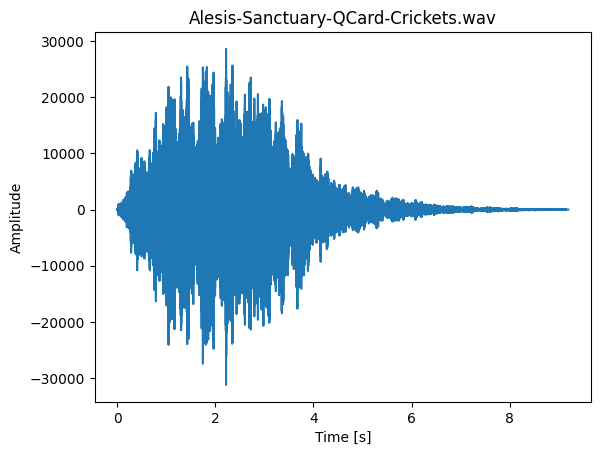

In [9]:
plt.plot(time, data[:, 0])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Alesis-Sanctuary-QCard-Crickets.wav')
plt.show()

In [10]:
sd.play(data[:, 0], samplerate)
sd.wait()

Stereo to Mono

In [11]:
asegment = AudioSegment.from_wav('Alesis-Sanctuary-QCard-Crickets.wav')
asegment = asegment.set_channels(1)
asegment.export("mono.wav",format="wav")
s,a = wavfile.read("mono.wav")

Sampling Rate: 44100
Audio Shape: (405562,)


/var/folders/qc/xddyngm56mdcypsnpqnvckxm0000gn/T/ipykernel_38431/3021550475.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(t,a,'k-',color='purple')


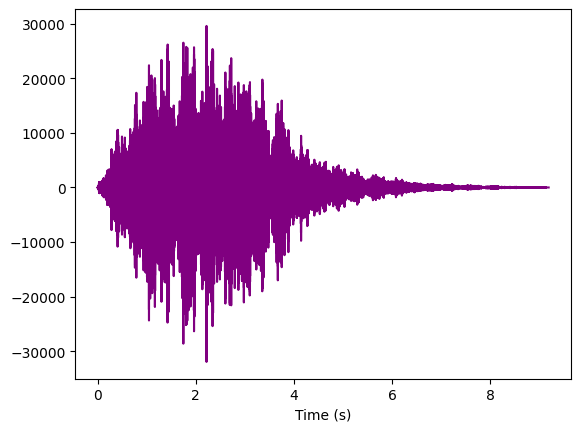

In [12]:
print('Sampling Rate:',s)
print('Audio Shape:',np.shape(a))
duration = len(data)/samplerate
time = np.arange(0,duration,1/samplerate) #time vector
na = data.shape[0]
la = na / s
t = np.linspace(0,la,na)
plt.plot(t,a,'k-',color='purple')
plt.xlabel('Time (s)')
plt.show()

Спектрограмма

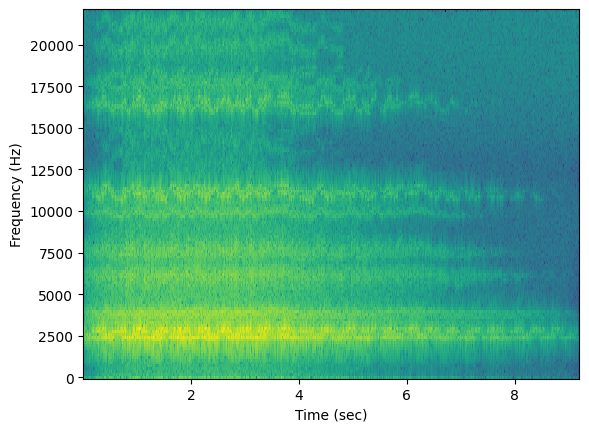

In [13]:
adata = data[:, 0]
s = samplerate
fr, tm, spgram = signal.spectrogram(adata,s)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

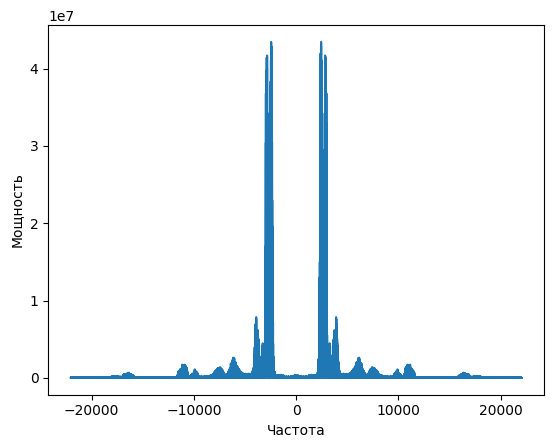

In [14]:
from scipy.fft import fft, fftfreq

N = int(samplerate * duration)
yf = fft(data[:, 0])
xf = fftfreq(N, 1 / samplerate)
plt.plot(xf, np.abs(yf))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.show()

In [15]:
np.max(xf)

22049.891262001864

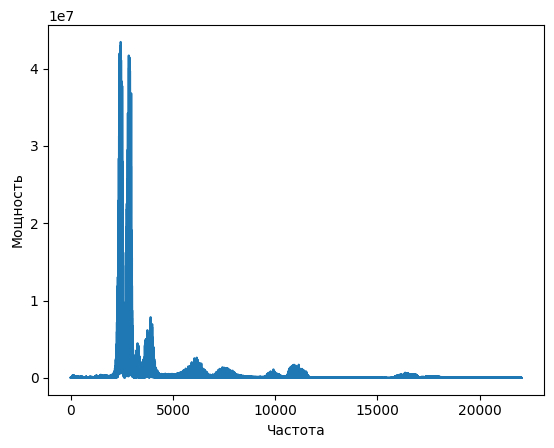

In [16]:
from scipy.fft import rfft, rfftfreq
# число точек в normalized_tone
rN = int(samplerate * duration)
ryf = rfft(data[:, 0])
rxf = rfftfreq(rN, 1 / samplerate)
plt.plot(rxf, np.abs(ryf))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.show()

In [28]:
# Максимальная частота составляет половину частоты дискретизации
points_per_freq = len(rxf) / (samplerate / 2)
# Наша целевая частота
target_idx = int(points_per_freq * 3000)

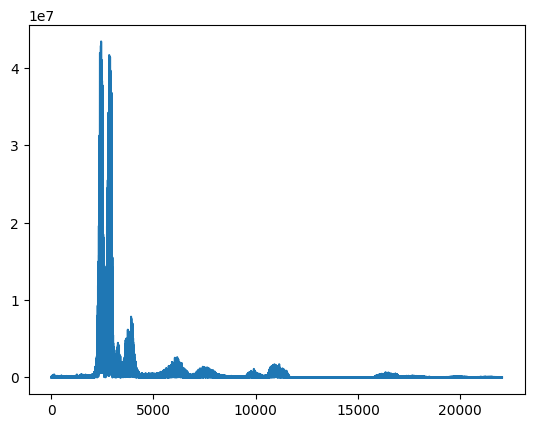

In [29]:
ryf[target_idx-2:target_idx+2] = 0
plt.plot(rxf, np.abs(ryf))
plt.show()

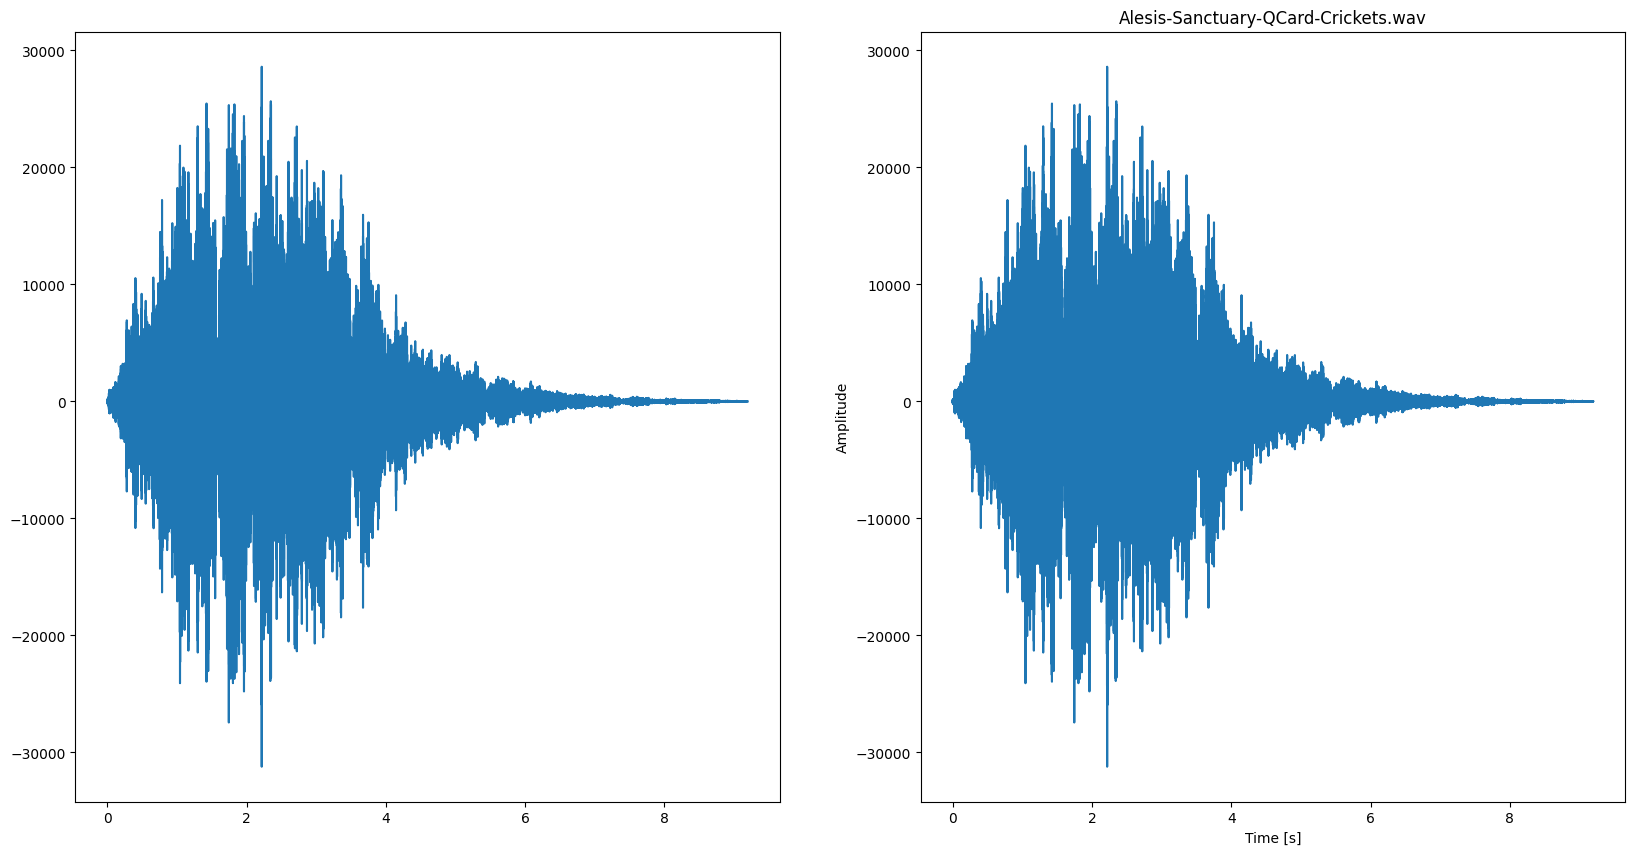

In [19]:
from scipy.fft import irfft
new_sig = irfft(ryf)
fig, ax = plt.subplots(nrows= 1 , ncols= 2, figsize=(20, 10))
ax[0].plot(time, data[:, 0])
ax[1].plot(time, new_sig)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Alesis-Sanctuary-QCard-Crickets.wav')
plt.show()

In [20]:
sd.play(data[:, 0], samplerate)
sd.wait()
# sd.play(new_sig, samplerate)
# sd.wait()

In [21]:
import librosa
import math


samples, sample_rate = librosa.load("Alesis-Sanctuary-QCard-Crickets.wav")
x = samples

def fft_(x, elem, sr):
    s = 0
    for n in range(0, sr - 1):
        s += x[n] * math.exp(-2 * math.pi * elem * n / sr)
    return s

def b_reverse(f):
    return 700 * (math.exp(f / 1125) - 1)

def b(f):
    return math.log(f / 700 + 1) * 1125

def freq(f_1, f_m, M, m, F):
    return N / F[s] * b_reverse(b) * (b(f_1) + m * (b[f_m] - b[f_1]) / (M + 1))

def dkp():
    pass

def wind(m, f):
    h = []
    for k in range(1, len(f)):
        if k < f[m - 1]:
            h[m] = 0
        elif f[m - 1] <= k < f[m]:
            h[m] = (k - f[m - 1]) / (f[m] - f[m - 1])
        elif f[m] <= k < f[m + 1]:
            h[m] = (f[m + 1] - k) / (f[m + 1] - f[m])
        else:
            h[m] = 0
    return h


data = []
M = 10
N = 200
h = 4
f_1 = 500
f_m = 5000
F = sample_rate
for m in range(M):
    s = 0
    for k in range(N - 1):
        H = wind(m, freq(f_1, f_m, M, m, F))
        s += math.ln(fft(x) ** 2 * H)
    data[m] = s


[Text(0.5, 1.0, 'MFCC')]

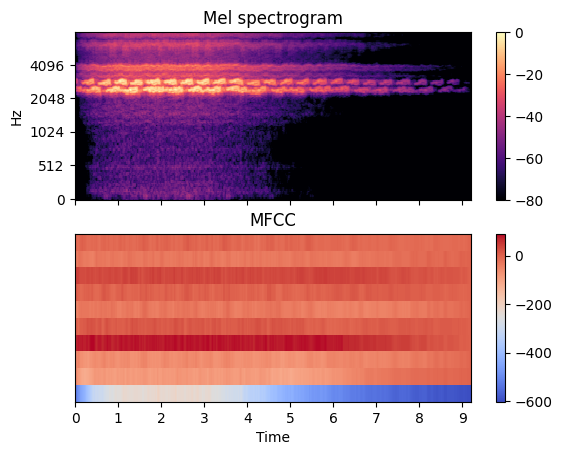

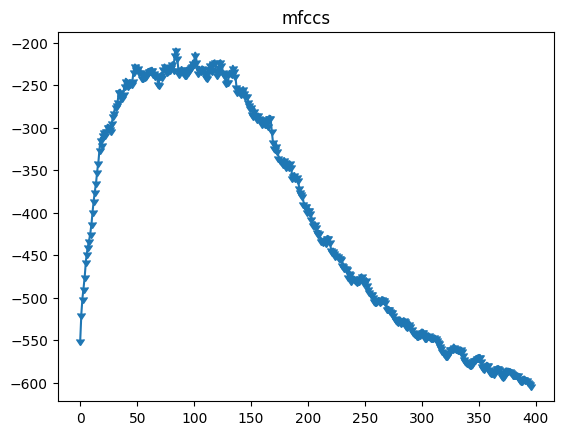

In [27]:
s = mfccs[0:1,:][0,:]
t = [*range(len(s))]
plt.plot(t, s.reshape(397,1),marker=matplotlib.markers.CARETDOWNBASE)
plt.title('mfccs')
plt.show()

In [46]:
def freq_to_mel(freq):
    return 2595.0 * np.log10(1.0 + freq / 700.0)

def met_to_freq(mels):
    return 700.0 * (10.0**(mels / 2595.0) - 1.0)

In [47]:
def get_filter_points(fmin, fmax, mel_filter_num, FFT_size, sample_rate=44100):
    fmin_mel = freq_to_mel(fmin)
    fmax_mel = freq_to_mel(fmax)

    mels = np.linspace(fmin_mel, fmax_mel, num=mel_filter_num+2)
    freqs = met_to_freq(mels)

    return np.floor((FFT_size + 1) / sample_rate * freqs).astype(int), freqs

In [48]:
def get_filters(filter_points, FFT_size):
    filters = np.zeros((len(filter_points)-2,int(FFT_size/2+1)))

    for n in range(len(filter_points)-2):
        filters[n, filter_points[n] : filter_points[n + 1]] = np.linspace(0, 1, filter_points[n + 1] - filter_points[n])
        filters[n, filter_points[n + 1] : filter_points[n + 2]] = np.linspace(1, 0, filter_points[n + 2] - filter_points[n + 1])

    return filters

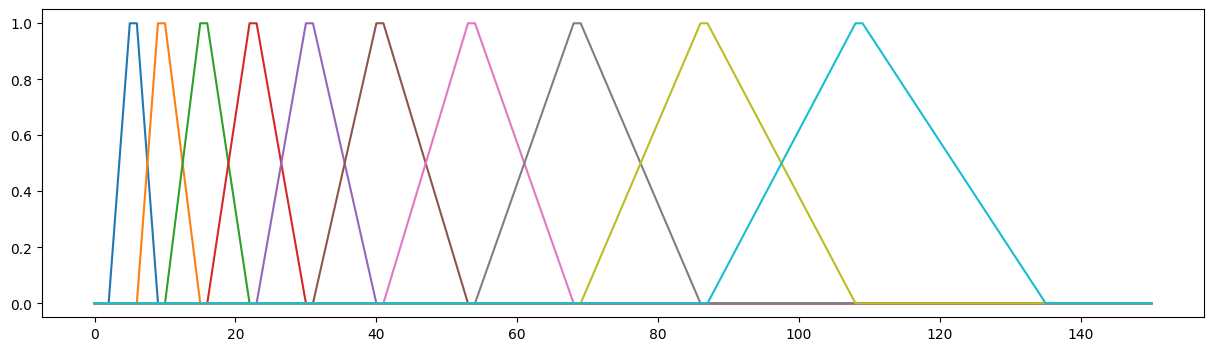

In [59]:
M = 1000
N = 300
h = 10
f_1 = 100
f_m = 6000
filter_points, mel_freqs = get_filter_points(f_1, f_m, h, M, sample_rate=44100)
filter_points

filters = get_filters(filter_points, N)

plt.figure(figsize=(15,4))
for n in range(filters.shape[0]):
    plt.plot(filters[n])

In [ ]:
signal = fft(x)
res = np.dot(signal, filters)